# A Case study on how different countries develop
## Data Science Assignment 

Group Members:
1) Chavda Haarit R. *(23110077)*
2) Darpana Desai *(23110085)*
3) Siddharth Rajandekar *(23110310)*

In [2]:
import pandas as pd
import numpy as np

In [3]:
data_wdi = pd.read_csv('./WDI_CSV/WDICSV.csv')

In [4]:
print(data_wdi.head())

                  Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                      Indicator Name     Indicator Code  1960  \
0  Access to clean fuels and technologies for coo...     EG.CFT.ACCS.ZS   NaN   
1  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.RU.ZS   NaN   
2  Access to clean fuels and technologies for coo...  EG.CFT.ACCS.UR.ZS   NaN   
3            Access to electricity (% of population)     EG.ELC.ACCS.ZS   NaN   
4  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   NaN   

   1961  1962  1963  1964  1965  ...       2014       2015       2016  \
0   NaN   NaN   NaN   NaN   NaN  ...  17.488497  18.001597  18.558234   
1   NaN   NaN   NaN   NaN   NaN  ...   6.811504   7.096003   7.406706   
2   NaN   N

In [5]:
print(data_wdi.columns)

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')


In [6]:
grp_countries = data_wdi.groupby('Country Name')
print(len(grp_countries))

266


In [7]:
indicators_filtered = [
                       'Research and development expenditure (% of GDP)',
                       'Renewable electricity output (% of total electricity output)',
                       'Life expectancy at birth, total (years)',
                        'GDP growth (annual %)',
                       'Forest area (% of land area)',
                       'Exports of goods and services (% of GDP)',
                       'Electric power consumption (kWh per capita)',
                       'Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990)',
                       'Arable land (% of land area)',
                       'Age dependency ratio (% of working-age population)'
                       ]

countries_filtered = [
                        "United States",
                        "United Kingdom",
                        "Germany",
                        "China",
                        "India",
                        "Japan",
                        "Brazil",
                        "Indonesia",
                        "South Africa",
                        "Mexico",
                        "Niger",
                        "Chad",
                        "Haiti",
                        "Burundi"
                      ]

print(len(indicators_filtered))
print(len(countries_filtered))

10
14


In [8]:
data_wdi_filtered = data_wdi[data_wdi['Indicator Name'].isin(indicators_filtered) & data_wdi['Country Name'].isin(countries_filtered)]
print(data_wdi_filtered.shape)
print(data_wdi_filtered)
data_wdi_filtered.to_csv('data_wdi_filtered.csv', index=False)

(140, 68)
         Country Name Country Code  \
112256         Brazil          BRA   
112285         Brazil          BRA   
112329         Brazil          BRA   
112548         Brazil          BRA   
112596         Brazil          BRA   
...               ...          ...   
381941  United States          USA   
381953  United States          USA   
382185  United States          USA   
382695  United States          USA   
382702  United States          USA   

                                           Indicator Name     Indicator Code  \
112256  Age dependency ratio (% of working-age populat...        SP.POP.DPND   
112285                       Arable land (% of land area)     AG.LND.ARBL.ZS   
112329  Carbon dioxide (CO2) emissions (total) excludi...  EN.GHG.CO2.ZG.AR5   
112548        Electric power consumption (kWh per capita)  EG.USE.ELEC.KH.PC   
112596           Exports of goods and services (% of GDP)     NE.EXP.GNFS.ZS   
...                                                  

In [9]:
import pandas as pd
import pandas as pd
import plotly.express as px

def plot_data(indicator_name):

    df = pd.read_csv('data_wdi_filtered.csv')

    
    id_vars = ['Country Name', 'Indicator Name']
    value_vars = [col for col in df.columns[-24:] if col not in id_vars]

    df_long = df.melt(id_vars=id_vars, value_vars=value_vars,
                    var_name='Year', value_name='Value')

    df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

    grouped = df_long.groupby('Indicator Name')

    data = grouped.get_group(indicator_name)
    
    
    fig = px.line(data,
                    x='Year',
                    y='Value',
                    color='Country Name',      
                    markers=True,
                    title=indicator_name)
        
    fig.update_layout(
        xaxis_title='Year',
        yaxis_title='Value',
        legend_title='Country'
    )

    fig.show()
    del df_long,df

## Research and Development Expenditure:  
Hypothesis - Developed countries can generally afford to spend more money on R&D than underdeveloped and developing countries, who require funds for infrastructure. Over time, expense on R&D should increase to align with SDG 9: Industry, Innovation and Infrastructure.  
Observation - The top three countries spending on R&D are Japan, US, and Germany; all are developed. Least expenditure is from underdeveloped countries like Indonesia and Burundi. Over time, there is a slight increase in expense for all countries, except United Kingdom which has experienced a dramatic surge. 

In [10]:
plot_data(indicators_filtered[0])

## Renewable Electricity:  
Hypothesis - Developed countries generally have more sources and technology of renewable electricity than underdeveloped and developing countries, who depend primarily on fossil fuels for electricity. Over time, dependence on renewable electricity should increase to align with SDG 7: Affordable and Clean Energy.  
Observation - The leading countries in renewable electricity are Brazil and Burundi. Over time, there is a slight increase in renewable electricity output for most countries, except Haiti which has shown a significant decline.  

In [11]:
plot_data(indicators_filtered[1])

# Life Expectancy at Birth:  
Hypothesis - Developed countries generally have better healthcare facilities such as hospitals, doctors, and medical infrastructure compared to underdeveloped and developing countries, which often struggle with poor health systems. Over time, life expectancy should increase with improvements in healthcare to align with SDG 3: Good Health and Well Being.  
Observation - The top countries in life expectancy are Japan, UK, and Germany; all are developed. Over time, there is a slight increase in life expectancy for all countries, except Haiti which saw a sharp decline in 2010 due to the devastating earthquake. 

In [12]:
plot_data(indicators_filtered[2])

## GDP Growth:  
Hypothesis - GDP growth is generally stagnant in developed countries, highly increasing in developing countries, and slightly increasing in underdeveloped countries, with various fluctuations due to economic events. Over time, GDP growth should become similar for all countries to align with SDG 8: Decent work and Economic growth.  
Observation - GDP growth is fluctuating for almost all countries. There are two major periods of fluctuation—the 2008 economic crisis and the 2020 COVID pandemic—both causing a significant dip in GDP growth across almost all nations. Chad saw a dramatic increase in GDP growth during 2004 due to the Doba oil project and the completion of the Chad-Cameroon pipeline.

In [13]:
plot_data(indicators_filtered[3])

## Forest Area:  
Hypothesis - Developed countries generally focus more on infrastructure growth, which may lead to less forest area compared to developing and underdeveloped countries that still retain vast forest lands. Over time, forest area should increase to align with SDG 13: Climate Action and SDG 15: Life on Land.  
Observation - The top countries in forest area are Japan, Brazil, and Indonesia; all have massive rainforests like the Amazon or managed forests. Over time, there has been no increase in forest area for any country except Brazil and Indonesia which have seen a slight decrease due to widespread forest fires.  

In [14]:
plot_data(indicators_filtered[4])

## Exports of Goods and Services:  
Hypothesis - Developed countries are generally more advanced in trade and technology and earn more from exports compared to developing and underdeveloped nations that rely more on imports. Over time, exports should increase to align with SDG 9: Industry, Innovation and Infrastructure and SDG 8: Decent work and Economic growth.  
Observation - The top exporting nations are Germany, UK, and Chad. Over time, there are slight variations in exports across all nations.  

In [15]:
plot_data(indicators_filtered[5])

## Electric Power Consumption:  
Hypothesis - Developed nations tend to consume more electricity due to larger industrial bases compared to developing and underdeveloped nations that have fewer industries or lower populations resulting in less power usage. Over time, electric power consumption should increase to align with SDG 7: Affordable and Clean Energy.  
Observation - The top consumers of electric power are US, Japan, and Germany; all are developed nations. Over time, there has been little change in power consumption across most nations.  

In [16]:
plot_data(indicators_filtered[6])

## Carbon Dioxide Emissions:  
Hypothesis - Developed nations generally use more electricity and have larger industrial bases compared to developing or underdeveloped nations resulting in higher CO2 emissions. Over time, CO2 emissions should decrease to align with SDG 12: Responsible Consumption and Production and SDG 13: Climate Action.  
Observation - The country leading CO2 emissions is Chad. Over time, CO2 emissions have increased across all nations.  

In [17]:
plot_data(indicators_filtered[7])

## Arable Land:  
Hypothesis - Developed nations prioritize infrastructure growth over agriculture leading to reduced arable land compared to developing or underdeveloped nations that retain larger agricultural areas. Over time, arable land should increase to align with SDG 13: Climate Action and SDG 15: Life on Land.  
Observation - The top nations with arable land are India, Burundi, and Haiti. Over time, there has been no significant change in arable land for any country except Burundi which saw a considerable increase.

In [18]:
plot_data(indicators_filtered[8])

## Age Dependency Ratio:  
Hypothesis - Developed nations generally have lower age dependency ratios due to smaller older populations combined with higher employment among younger populations compared to underdeveloped or developing nations that rely heavily on working-age populations for support. Over time, age dependency ratios should decrease to align with SDG 10: Reduced Inequalities.    
Observation - The top nations with high age dependency ratios are Niger, Chad, and Burundi; all are underdeveloped nations. Over time, age dependency ratios have decreased across most nations except Japan where reductions in birth rates have led to an aging population.

In [19]:
plot_data(indicators_filtered[9])

# Correlation 

Index(['Indicator Name', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')
(10, 24)


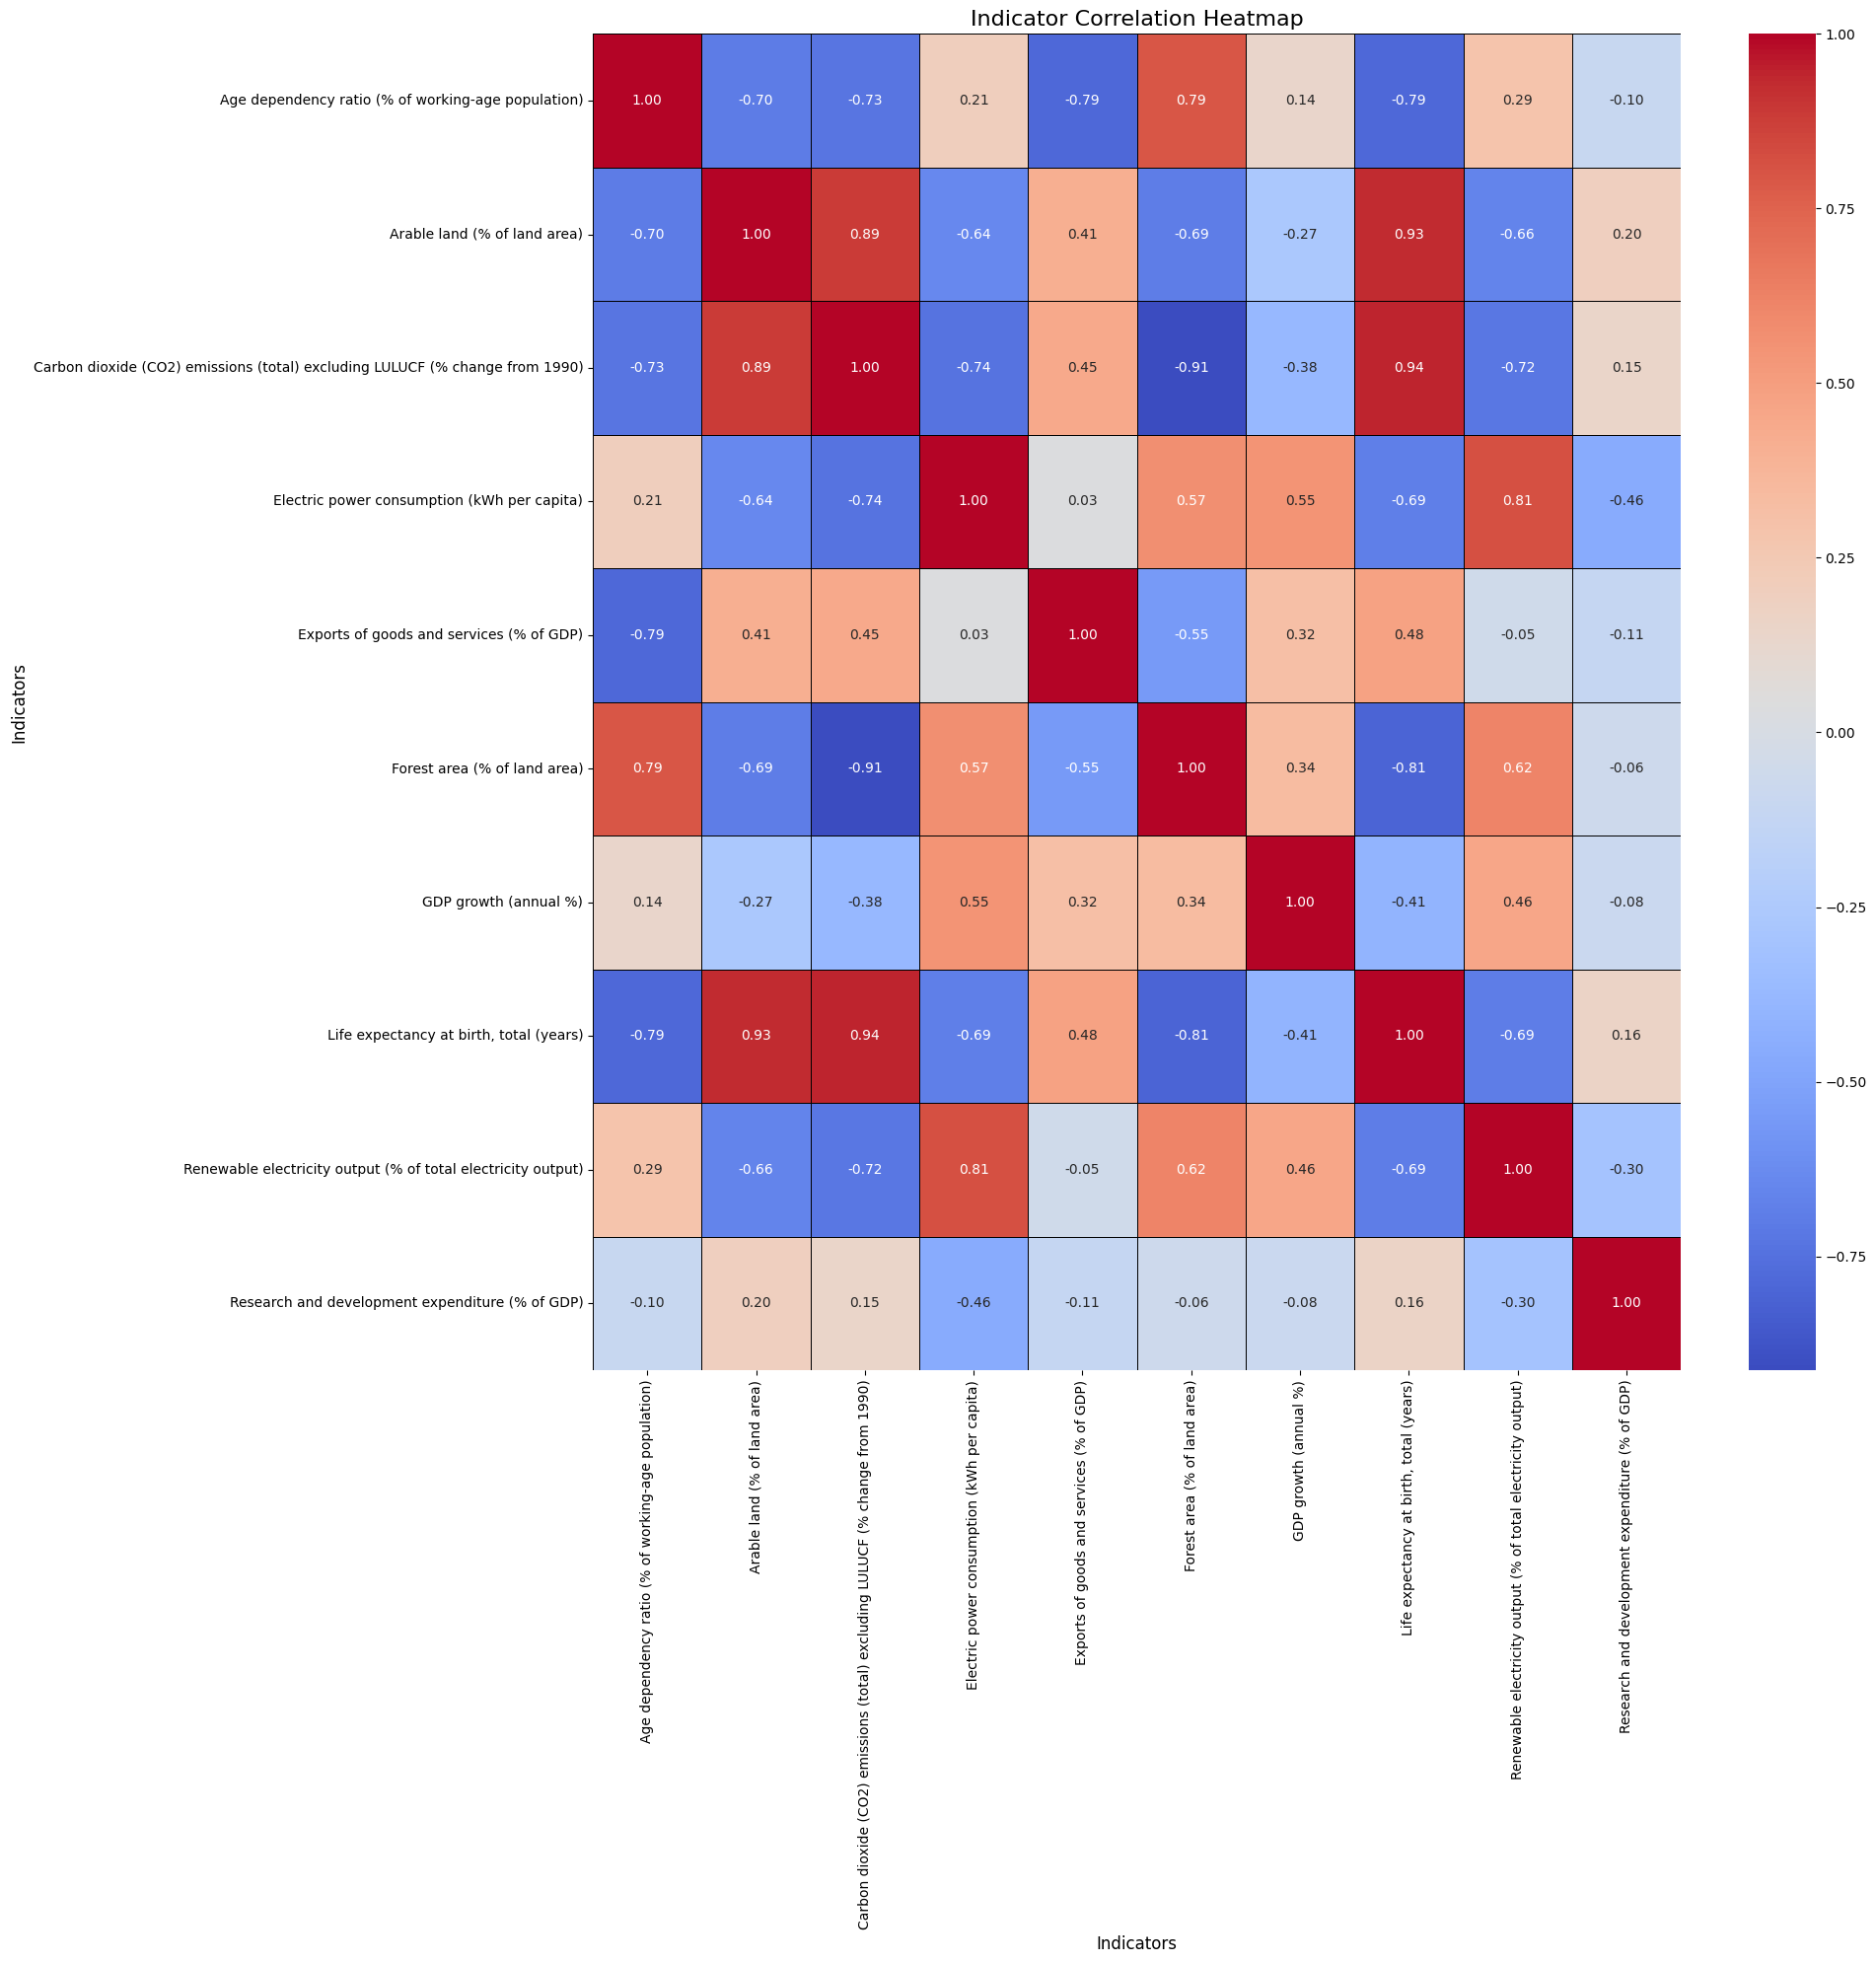

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

data = pd.read_csv('data_wdi_filtered.csv')
# data = data.fillna(0)
data.drop(columns=['Country Code', 'Indicator Code','Country Name','2023'], inplace=True)
data.drop(columns=[str(i) for i in range(1960,2000)], inplace=True)
print(data.columns)

data = data.groupby('Indicator Name').mean().reset_index()
print(data.shape)
# display(data)

indicator_names = data.iloc[:, 0].tolist()
data_numeric = data.iloc[:, 1:]

corr_matrix = data_numeric.T.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(
    corr_matrix,
    annot=True,             
    fmt=".2f",              
    cmap='coolwarm',        
    linewidths=0.5,         
    linecolor='black',      
    xticklabels=indicator_names, 
    yticklabels=indicator_names  
)

plt.title("Indicator Correlation Heatmap", fontsize=16)
plt.xlabel("Indicators", fontsize=12)
plt.ylabel("Indicators", fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


correlation_pairs = []
indicators = corr_matrix.index.tolist()
labels = indicator_names

for i in range(len(indicators)):
    print(f"{indicators[i]} : {labels[i]}")
    
print()

for i in range(len(indicators)):
    for j in range(i+1, len(indicators)):
        ind1 = indicators[i]
        ind2 = indicators[j]
        if ind1 in corr_matrix.index and ind2 in corr_matrix.columns:
             corr_value = corr_matrix.loc[ind1, ind2]
             correlation_pairs.append((ind1, ind2, corr_value))
        

corr_df = pd.DataFrame(correlation_pairs, columns=['Indicator 1', 'Indicator 2', 'Correlation'])
# display(corr_df)
corr_df = corr_df.sort_values('Correlation', ascending=False)
top_positive = corr_df.head(5)
top_negative = corr_df.tail(5)

print("Top 5 Positive Correlations:")
print(top_positive)
print("\nTop 5 Negative Correlations:")
print(top_negative)

def plot_correlation_pair(ind1, ind2, corr_value, corr_type="Positive"):
    ind1_str = int(ind1)
    ind2_str = int(ind2)

    x = pd.to_numeric(data.loc[ind1], errors='coerce').values
    y = pd.to_numeric(data.loc[ind2], errors='coerce').values

    valid = ~(np.isnan(x) | np.isnan(y))
    x = x[valid]
    y = y[valid]

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7, s=80, color='#38b6c1')

    if len(x) > 1:
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(x, p(x), 'r--', linewidth=2)

    plt.title(f"{corr_type} Correlation: {labels[ind1_str]} vs {labels[ind2_str]}\nCorrelation: {corr_value:.2f}", fontsize=14)
    plt.xlabel(labels[ind1_str], fontsize=12)
    plt.ylabel(labels[ind2_str], fontsize=12)

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# for _, row in top_positive.iterrows():
#     print(row)
    # plot_correlation_pair(row['Indicator 1'], row['Indicator 2'], row['Correlation'], "Positive")

# for _, row in top_negative.iterrows():
#     plot_correlation_pair(row['Indicator 1'], row['Indicator 2'], row['Correlation'], "Negative")


def util_plot(data,pn = 'p'):
    if pn == 'p':
        plot_correlation_pair(data['Indicator 1'], data['Indicator 2'], data['Correlation'], "Positive")
    else:
        plot_correlation_pair(data['Indicator 1'], data['Indicator 2'], data['Correlation'], "Negative")
        

0 : Age dependency ratio (% of working-age population)
1 : Arable land (% of land area)
2 : Carbon dioxide (CO2) emissions (total) excluding LULUCF (% change from 1990)
3 : Electric power consumption (kWh per capita)
4 : Exports of goods and services (% of GDP)
5 : Forest area (% of land area)
6 : GDP growth (annual %)
7 : Life expectancy at birth, total (years)
8 : Renewable electricity output (% of total electricity output)
9 : Research and development expenditure (% of GDP)

Top 5 Positive Correlations:
    Indicator 1  Indicator 2  Correlation
21            2            7     0.943873
14            1            7     0.931494
9             1            2     0.886051
28            3            8     0.814677
4             0            5     0.792868

Top 5 Negative Correlations:
    Indicator 1  Indicator 2  Correlation
17            2            3    -0.738053
6             0            7    -0.787494
3             0            4    -0.789449
36            5            7    -0.807

### Top 5 positive correlations

## CO2 emissions vs Life Expectancy
Hypothesis - An increase in CO2 emissions implies an increase in infrastructure and industrial growth. Better infrastructure means better healthcare facilities and better quality of life in general. Thus, it means an increased life expectancy at birth.

Observation - We observe that there is a strong positive correlation between CO2 emissions and life expectancy. This means that as 

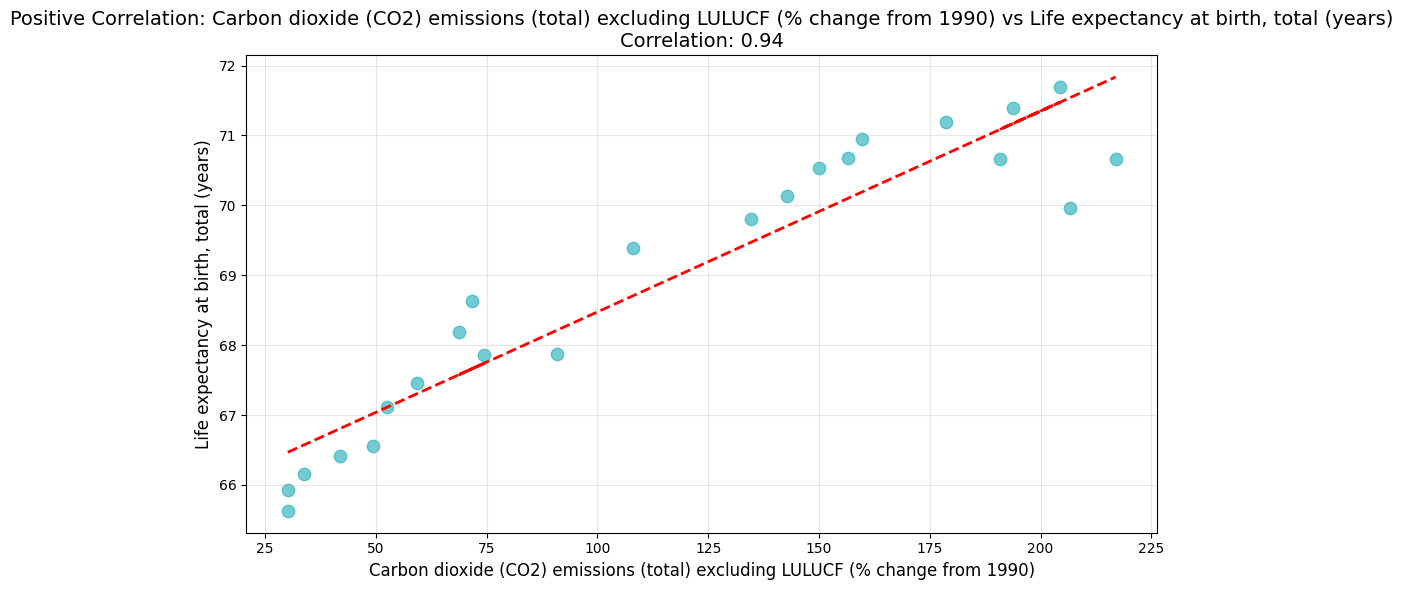

In [42]:
util_plot(top_positive.iloc[0], 'p')

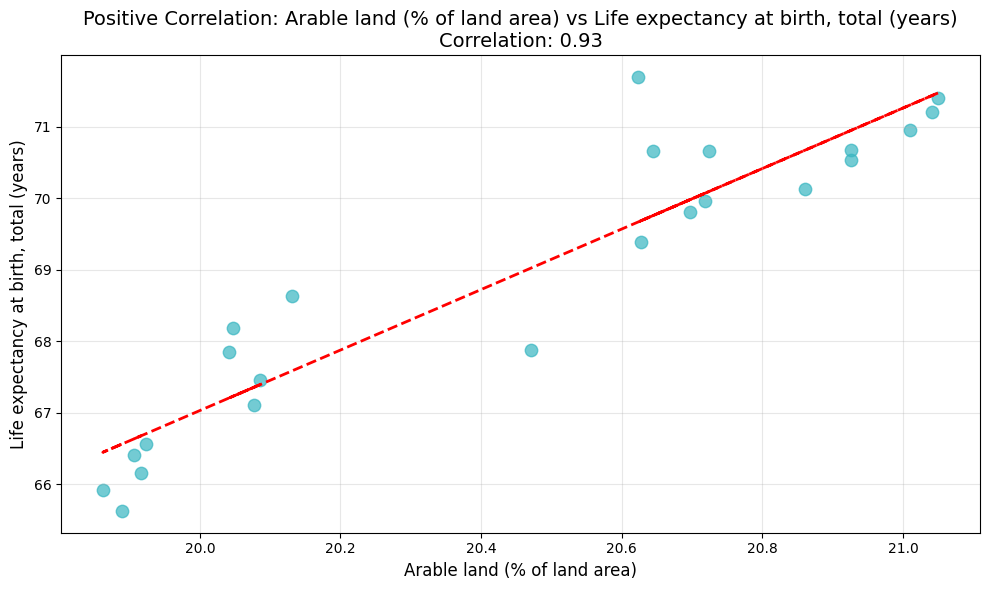

In [43]:
util_plot(top_positive.iloc[1], 'p')

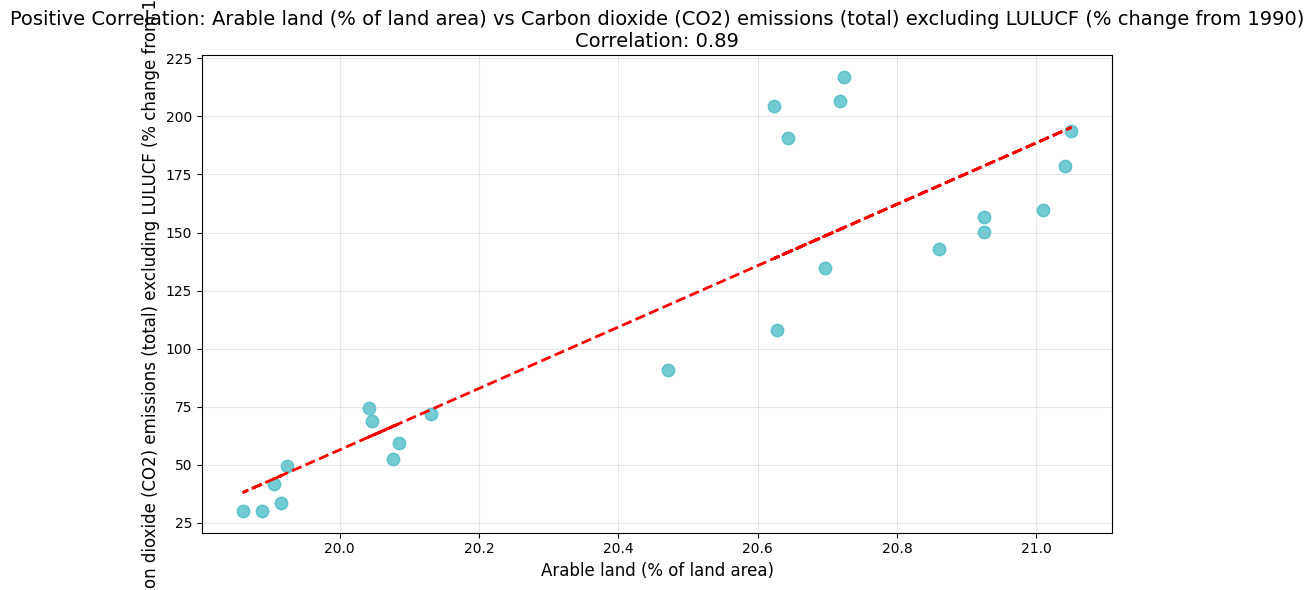

In [44]:
util_plot(top_positive.iloc[2], 'p')

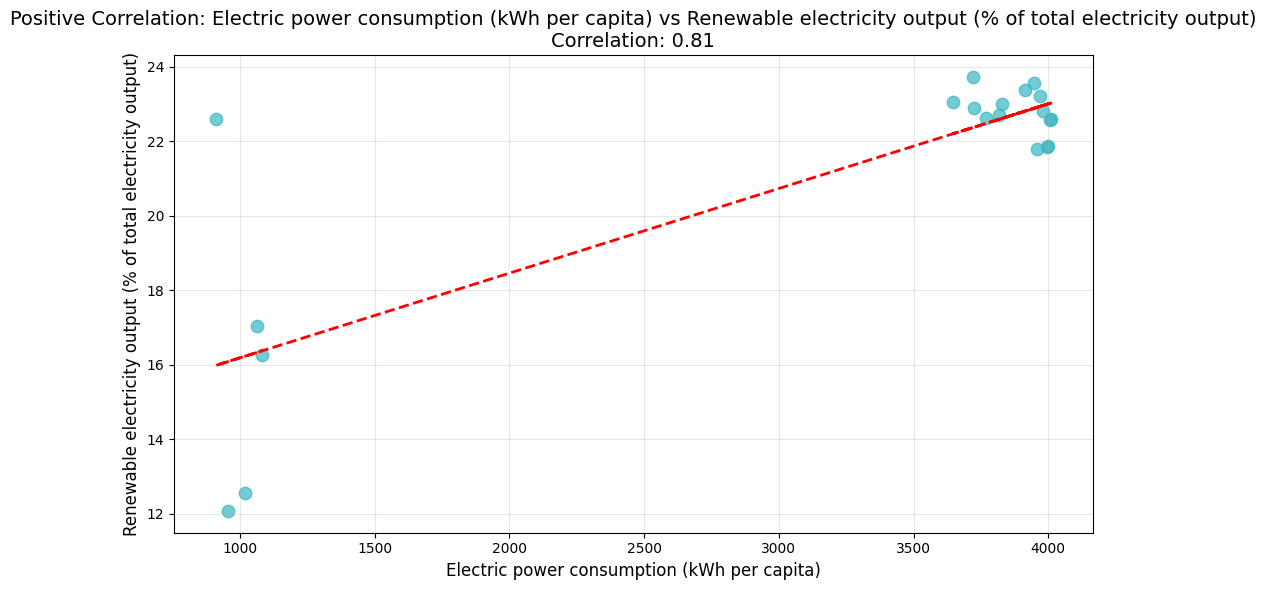

In [45]:
util_plot(top_positive.iloc[3], 'p')

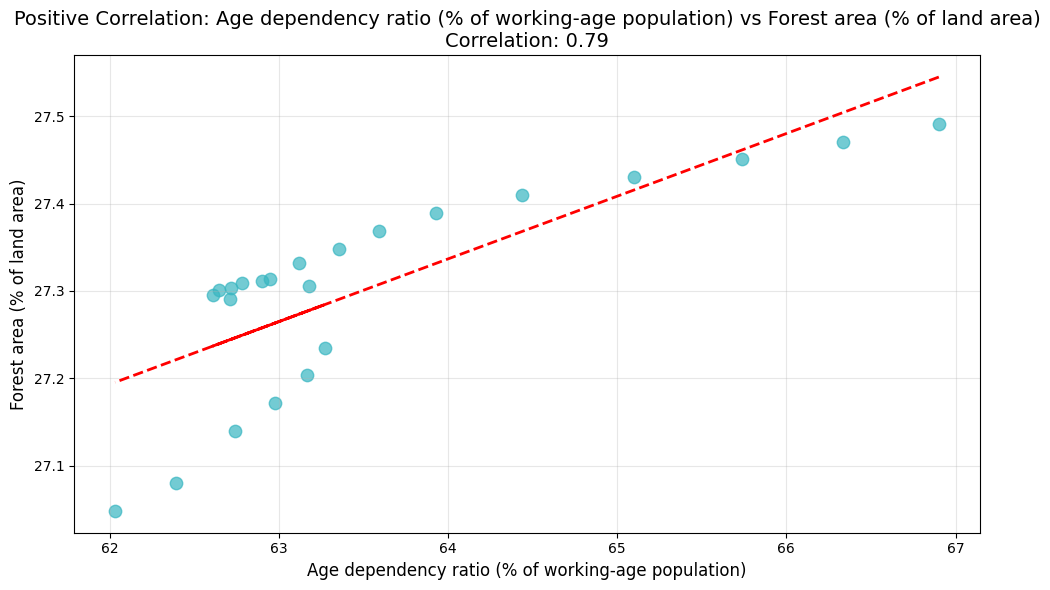

In [46]:
util_plot(top_positive.iloc[4], 'p')

### Top 5 negative correlations

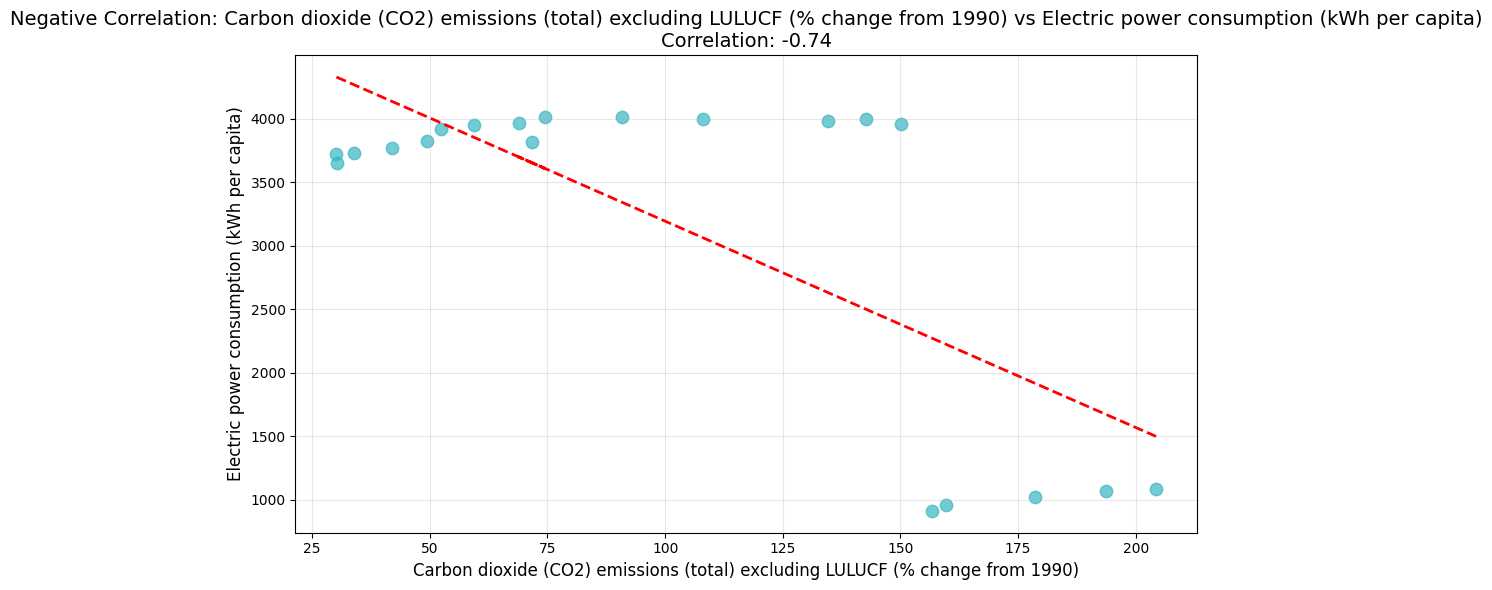

In [51]:
util_plot(top_negative.iloc[0], 'n')

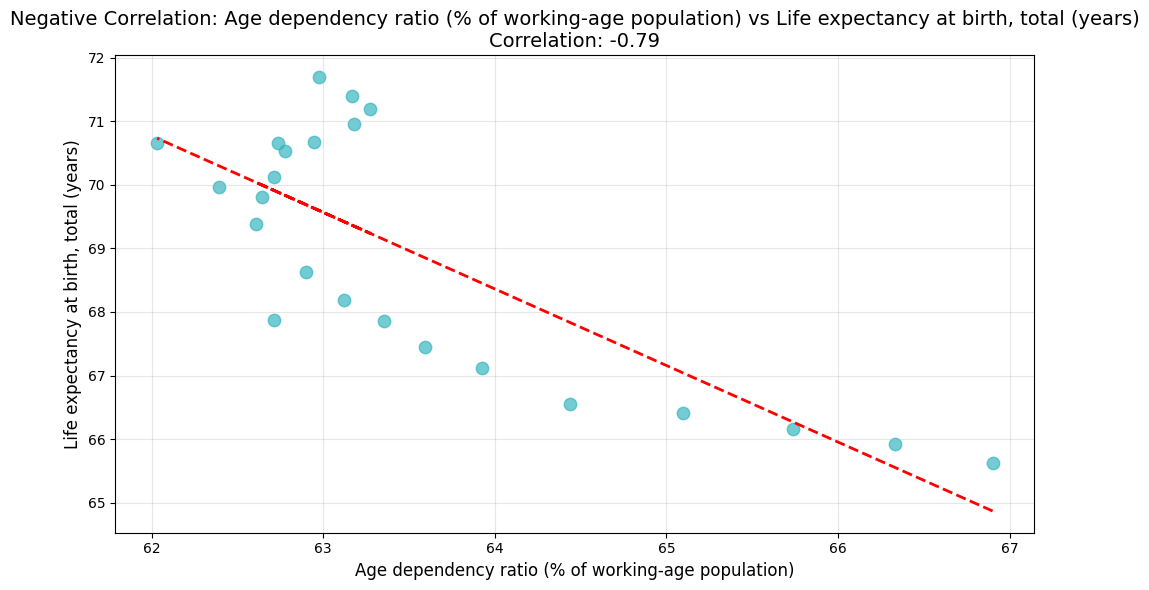

In [52]:
util_plot(top_negative.iloc[1], 'n')

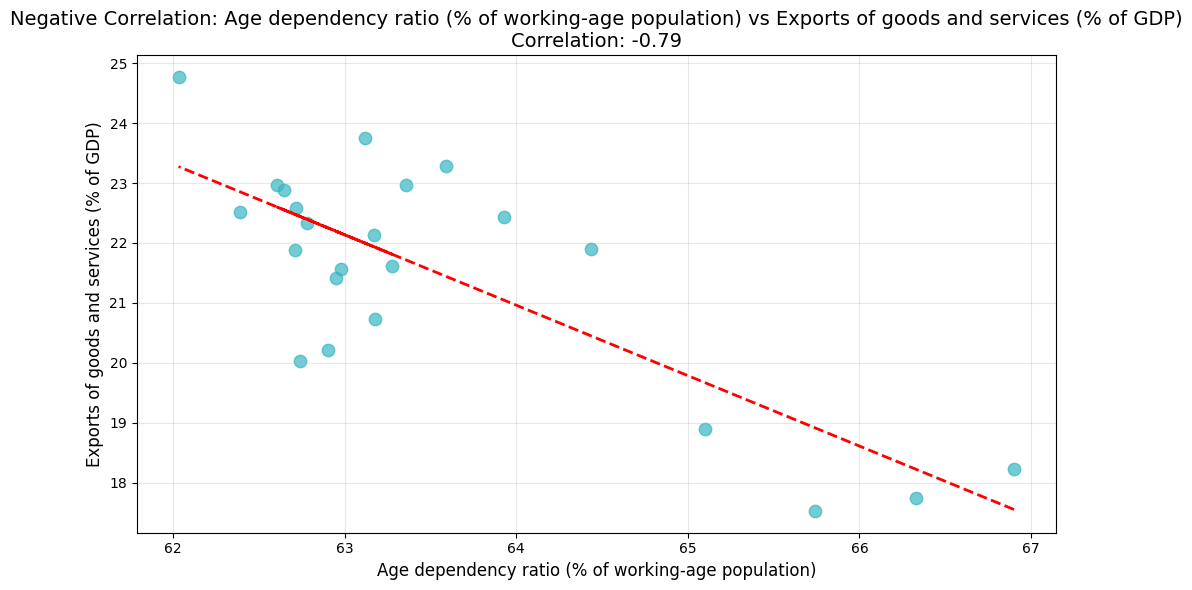

In [53]:
util_plot(top_negative.iloc[2], 'n')

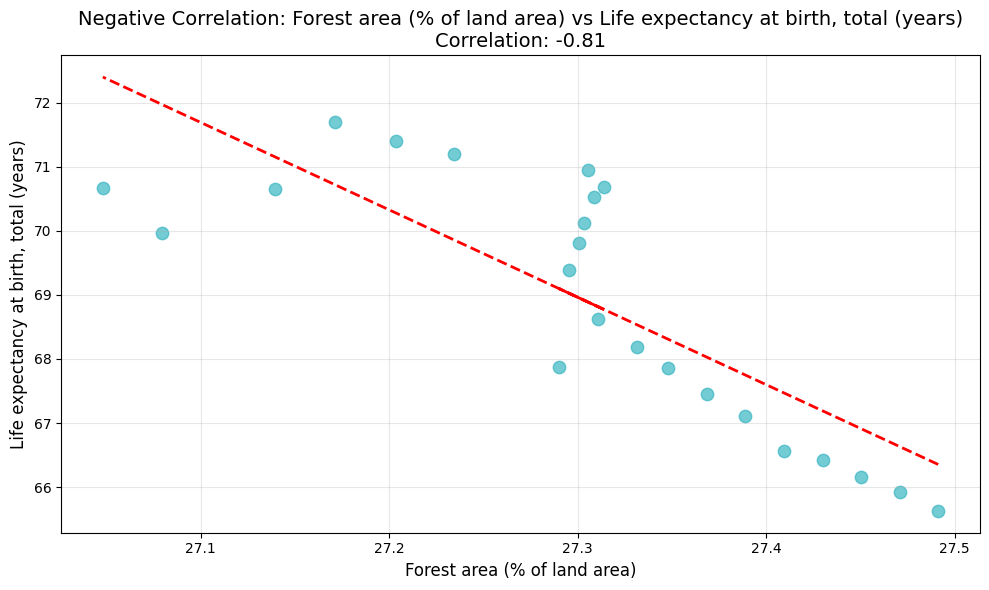

In [54]:
util_plot(top_negative.iloc[3], 'n')

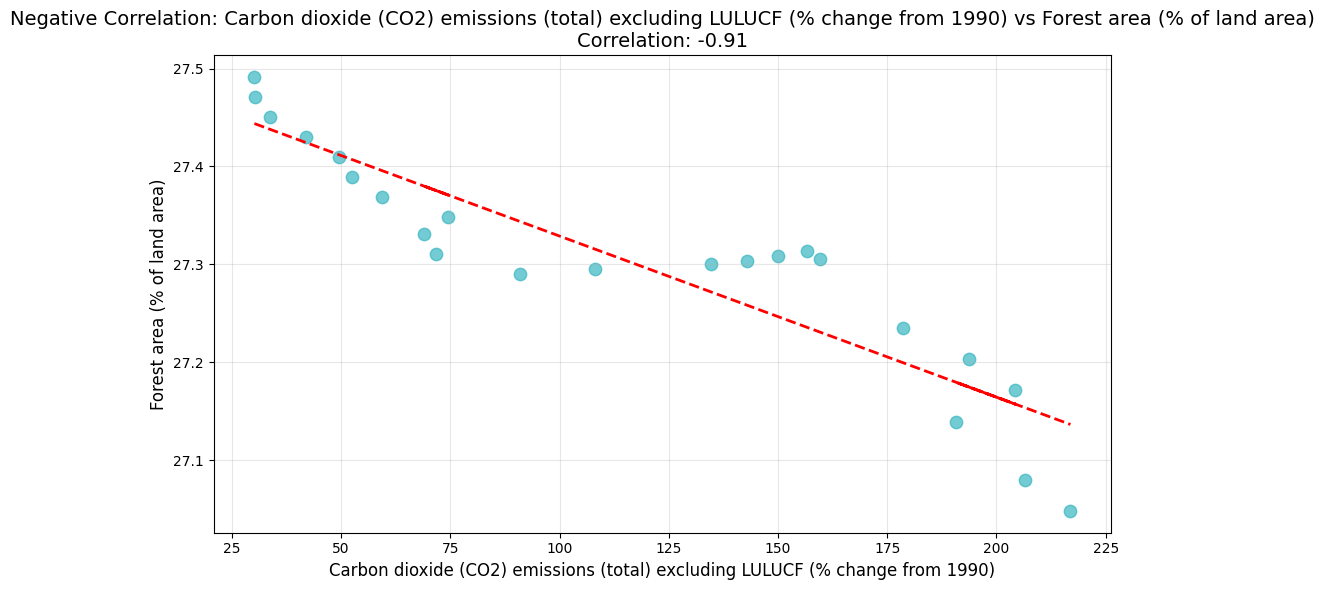

In [55]:
util_plot(top_negative.iloc[4], 'n')

CO2 emissions vs Forest area:
Hypothesis - 